In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn

seaborn.set(context="notebook", style="darkgrid")
plt.rcParams["figure.figsize"] = (8, 6)
# plt.rcParams["xtick.direction"] = "in"
# plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 18

from tqdm.auto import tqdm, trange

from ssptools import evolve_mf_3 as emf3
from limepy import limepy

import numpy as np
import scipy as sp
import astropy.units as u
import astropy.constants as const

from binaryshift import BinaryShift

In [2]:
m123 = [0.1, 0.5, 1.0, 100]  # Slope breakpoints for initial mass function
a12 = [-0.468, -1.178, -2.117]  # Slopes for initial mass function
a12 = [-0.3, -1.3, -2.3]  # Slopes for initial mass function


# up the number of low mass bins from 5 to 15, fixes the mass ratio distribution and doens't have a have impact on runtime
nbin12 = [15, 5, 20]


# Output times for the evolution
tout = np.array([11000])

# Integration settings
N0 = 5e6  # Normalization of stars
Ndot = 0.0  # -0.0001  # Regulates how low mass objects are depleted default -20, 0 for 47 Tuc
tcc = 0  # Core collapse time
NS_ret = 0.1  # Initial neutron star retention
BH_ret_int = 1  # Initial Black Hole retention
BH_ret_dyn = 0.00235  # Dynamical Black Hole retention
FeHe = -0.7  # Metallicity

In [3]:
f = emf3.evolve_mf(
    m123=m123,
    a12=a12,
    nbin12=nbin12,
    tout=tout,
    N0=N0,
    Ndot=Ndot,
    tcc=tcc,
    NS_ret=NS_ret,
    BH_ret_int=BH_ret_int,
    BH_ret_dyn=BH_ret_dyn,
    FeHe=FeHe,
    natal_kicks=True,
    vesc=100,
)

In [4]:
f

In [5]:
cs = f.Ns[-1] > 10 * f.Nmin
cr = f.Nr[-1] > 10 * f.Nmin
mj = np.r_[f.ms[-1][cs], f.mr[-1][cr]]
Mj = np.r_[f.Ms[-1][cs], f.Mr[-1][cr]]
dms = f.mes[-1][1:] - f.mes[-1][0:-1]
nms = len(f.ms[-1][cs])

In [6]:
f.Nmin

0.1

In [7]:
Mj / mj

array([8.15439217e+04, 8.79043150e+04, 9.47608166e+04, 1.02152122e+05,
       1.10119947e+05, 1.18709259e+05, 1.27968534e+05, 1.37950029e+05,
       1.48710076e+05, 1.60309403e+05, 1.72813472e+05, 1.86292854e+05,
       2.00823622e+05, 2.16487785e+05, 2.33373746e+05, 3.06571734e+05,
       2.94083264e+05, 2.82103523e+05, 2.46702762e+05, 7.18508214e+05,
       4.94101905e+05, 9.34994217e+04, 8.16264703e+04, 1.46248291e+05,
       1.45058480e+04, 7.32300749e+00, 1.19583568e+01, 1.77342985e+01,
       2.79599451e+01, 4.82943067e+01, 1.87004258e+01])

In [8]:
bs = BinaryShift(mj=mj, Mj=Mj, MF=f, verbose=False)

In [9]:
bs.dump()

self.mj = array([0.10563281, 0.11759716, 0.13091663, 0.14574472, 0.16225228,
       0.18062956, 0.20108831, 0.22386429, 0.24921996, 0.2774475 ,
       0.3088722 , 0.34385617, 0.38280255, 0.42616013, 0.47442855,
       0.53605839, 0.61576939, 0.70733328, 0.80741259, 0.61576939,
       0.70733328, 0.80741259, 0.9275805 , 1.11806267, 1.40755751,
       2.80844646, 3.53562462, 4.45108767, 5.60358738, 7.05449855,
       8.8810875 ])
self.Mj = array([8.61371324e+03, 1.03372974e+04, 1.24057667e+04, 1.48881320e+04,
       1.78672129e+04, 2.14424009e+04, 2.57329758e+04, 3.08820849e+04,
       3.70615188e+04, 4.44774432e+04, 5.33772769e+04, 6.40579468e+04,
       7.68757942e+04, 9.22584631e+04, 1.10719169e+05, 1.64340349e+05,
       1.81087472e+05, 1.99541212e+05, 1.99190915e+05, 4.42435364e+05,
       3.49494723e+05, 7.54926100e+04, 7.57151219e+04, 1.63514755e+05,
       2.04178153e+04, 2.05662745e+01, 4.22802608e+01, 7.89369176e+01,
       1.56675995e+02, 3.40692117e+02, 1.66080118e+02])
self.

In [10]:
bs.MS_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [11]:
bs.mj[bs.MS_mask]

array([0.10563281, 0.11759716, 0.13091663, 0.14574472, 0.16225228,
       0.18062956, 0.20108831, 0.22386429, 0.24921996, 0.2774475 ,
       0.3088722 , 0.34385617, 0.38280255, 0.42616013, 0.47442855,
       0.53605839, 0.61576939, 0.70733328, 0.80741259])

In [12]:
mj_new, Mj_new = bs.shift_flat(fb=0.05)
# mj_new, Mj_new = bs.shift_equal(fb=0.25)
# mj_new, Mj_new = bs.shift_solar(fb=0.25)

In [13]:
bs._q_min

0.13082878242190252

Text(0.5, 0, 'mj [$M_\\odot$]')

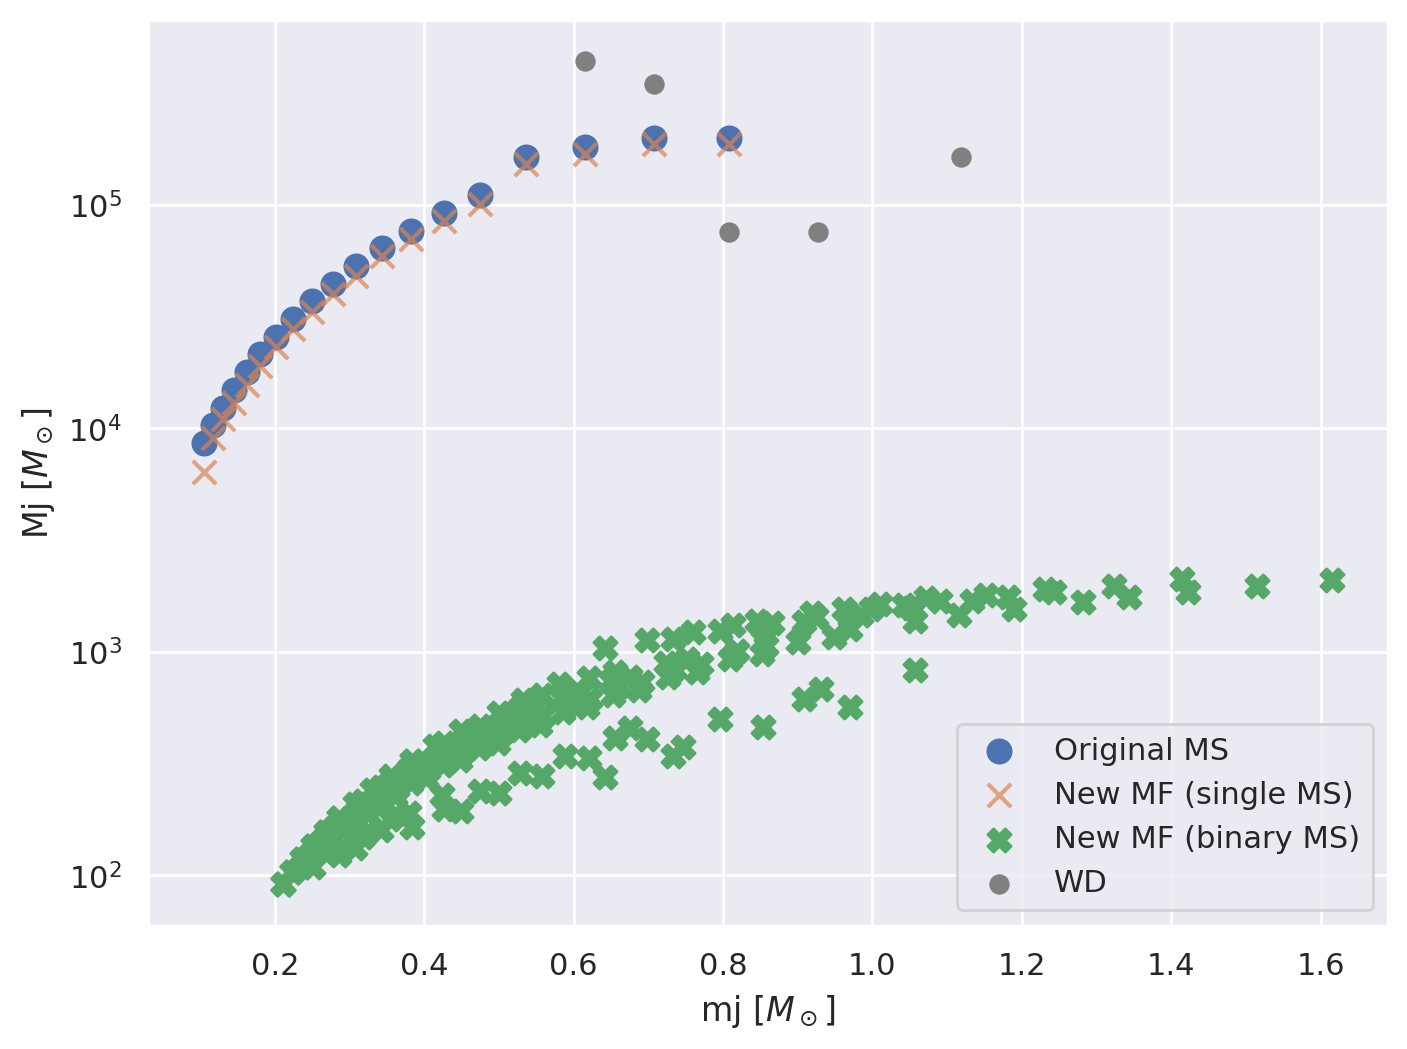

In [14]:
plt.figure()
plt.scatter(mj[bs.MS_mask], Mj[bs.MS_mask], label="Original MS", s=70)

# plt.scatter(mj, Mj, label="Original MF", s=70)

plt.yscale("log")
# plt.ylim(1e2, 1e5)
plt.scatter(
    mj_new[bs.MS_mask_new],
    Mj_new[bs.MS_mask_new],
    label="New MF (single MS)",
    marker="x",
    s=70,
    alpha=0.7,
)
plt.scatter(
    mj_new[bs.bin_mask],
    Mj_new[bs.bin_mask],
    label="New MF (binary MS)",
    marker="X",
    s=70,
)
plt.scatter(
    mj_new[bs.WD_mask_new],
    Mj_new[bs.WD_mask_new],
    label="WD",
    marker="o",
    color="grey",
    s=40,
)

plt.legend()
plt.ylabel(r"Mj [$M_\odot$]")
plt.xlabel(r"mj [$M_\odot$]")
# plt.savefig("shifted.png",dpi=300)
# plt.xlim(0, 1.7)

In [15]:
mj

array([0.10563281, 0.11759716, 0.13091663, 0.14574472, 0.16225228,
       0.18062956, 0.20108831, 0.22386429, 0.24921996, 0.2774475 ,
       0.3088722 , 0.34385617, 0.38280255, 0.42616013, 0.47442855,
       0.53605839, 0.61576939, 0.70733328, 0.80741259, 0.61576939,
       0.70733328, 0.80741259, 0.9275805 , 1.11806267, 1.40755751,
       2.80844646, 3.53562462, 4.45108767, 5.60358738, 7.05449855,
       8.8810875 ])

In [16]:
# Mass ratio
np.sum(Mj_new[bs.bin_mask]) / np.sum(Mj_new[bs.MS_mask_new])

0.08587620817570508

In [17]:
# check mass conservation
print(f"{np.sum(Mj) = :.3f}, {np.sum(Mj_new) = :.3f}")

np.sum(Mj) = 2493032.765, np.sum(Mj_new) = 2493032.765


In [18]:
# Have a look at Nj

In [19]:
Nj = Mj_new / mj_new

In [20]:
Nj[bs.bin_mask]

array([ 431.44932099,  465.10219598,  501.3799818 ,  540.48742045,
        582.64522373, 1145.43801502, 1234.78172344, 1622.07266453,
       1555.99610602, 1492.61123432, 1305.30561839,  431.44932099,
        465.10219598,  501.3799818 ,  540.48742045,  582.64522373,
        628.09131884,  677.08219125,  729.89433218,  786.82579904,
        848.19789761,  914.35699539,  985.67647643, 1062.55884854,
       1145.43801502, 1234.78172344, 1622.07266453, 1555.99610602,
       1492.61123432, 1305.30561839,  431.44932099,  465.10219598,
        501.3799818 ,  540.48742045,  582.64522373,  628.09131884,
        677.08219125,  729.89433218,  786.82579904,  848.19789761,
        914.35699539,  985.67647643, 1062.55884854, 1145.43801502,
       1234.78172344, 1622.07266453, 1555.99610602, 1492.61123432,
       1305.30561839,  431.44932099,  465.10219598,  501.3799818 ,
        540.48742045,  582.64522373,  628.09131884,  677.08219125,
        729.89433218,  786.82579904,  848.19789761,  914.35699

In [21]:
Nj[bs.MS_mask_new]

array([ 60673.49134485,  76688.89198124,  84347.9581572 ,  89003.00470363,
        96423.0560137 , 105740.37444669, 115072.47832059, 124035.04739426,
       133137.51101249, 144391.62688525, 156442.10924604, 171553.54663269,
       183391.40899343, 198043.917755  , 213204.2819418 , 284982.99944736,
       274130.81262853, 263924.64138035, 232280.23466913])

In [22]:
# This is the bad (old) definition
np.sum(Nj[bs.bin_mask]) / np.sum(Nj[bs.MS_mask_new])

0.05019402596681124

In [23]:
# This is the definition we want to use
print(f"Binary Fraction: {bs.fb_true * 100:.3f}")

Binary Fraction: 4.780


In [24]:
print(f"Input fb | True fb | Diff")
print("---------------------------")
bs.verbose = False
for fb in np.linspace(0, 0.1, 11):
    bs.shift_flat(fb=fb)
    # bs.shift_solar(fb=fb)
    # bs._shift_q(fb=[0.2,0.2],q=[1,1])

    print(f"{fb*100:.1f}  | {bs.fb_true*100:.2f} | {-1*(fb - bs.fb_true)*100:.2f}")

Input fb | True fb | Diff
---------------------------
0.0  | 0.00 | -0.00
1.0  | 0.96 | -0.04
2.0  | 1.91 | -0.09
3.0  | 2.87 | -0.13
4.0  | 3.83 | -0.17
5.0  | 4.78 | -0.22
6.0  | 5.73 | -0.27
7.0  | 6.69 | -0.31
8.0  | 7.64 | -0.36
9.0  | 8.59 | -0.41
10.0  | 9.54 | -0.46


In [25]:
fbs = np.linspace(0, 0.1, 31)

true_fbs = []

for fb in fbs:
    bs.shift_flat(fb=fb)
    # bs.shift_solar(fb=fb)

    # bs.shift_q(fb=[fb],q=[0.4])

    true_fbs.append(bs.fb_true)

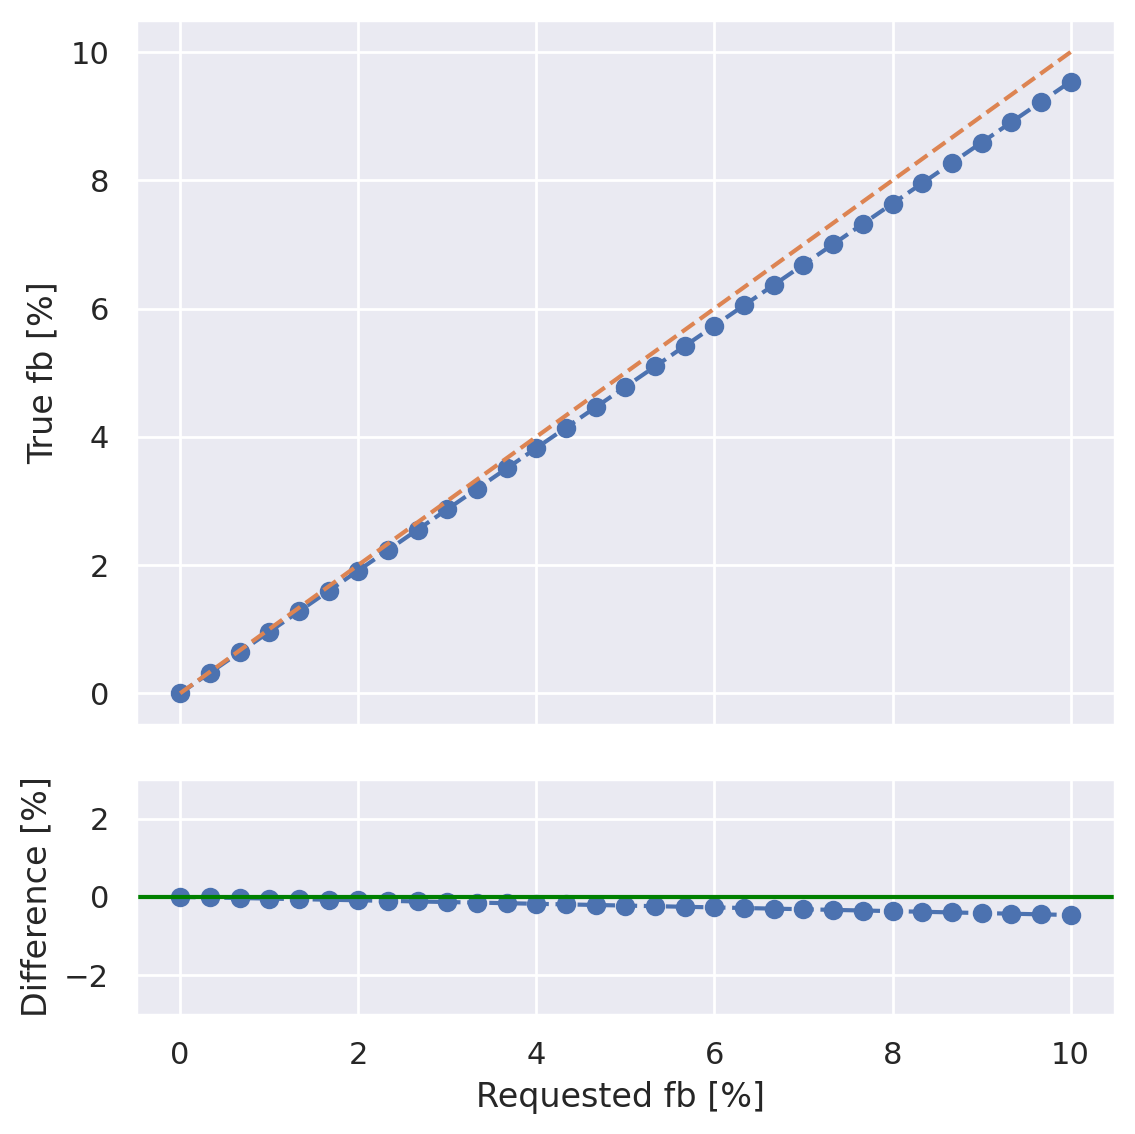

In [26]:
fig, axes = plt.subplots(
    2, 1, figsize=(6, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
)
axes[0].plot(np.array(fbs) * 100, np.array(true_fbs) * 100, "o--")
axes[1].set_xlabel("Requested fb [%] ")
axes[0].set_ylabel("True fb [%]")
axes[1].plot(np.array(fbs) * 100, np.array(true_fbs - fbs) * 100, "o--")
axes[0].plot(np.array(fbs) * 100, np.array(fbs) * 100, "--")

axes[1].set_ylabel("Difference [%]")
axes[1].set_ylim(-3, 3)
axes[1].axhline(0, color="green")
fig.tight_layout()

In [27]:
plt.close("all")

# Have a look at mass ratio distribution:


In [28]:
mj_new, Mj_new = bs.shift_flat(fb=0.05)
# mj_new, Mj_new = bs.shift_solar(fb=0.15)

# mj_new, Mj_new = bs._shift_q(fb=[0.05,0.05,0.05],q=[1,0.5,0.8])

qs = []
for masses in bs.binary_components:
    q = np.min(masses) / np.max(masses)
    qs.append(q)

In [29]:
len(qs)

163

In [30]:
len(bs.Nj_shifted[bs.bin_mask])

163

In [31]:
# qs

In [32]:
q_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [33]:
q_counts = []

for q, N in zip(qs, bs.Nj_shifted[bs.bin_mask]):
    q_count = [q] * int(N)
    q_counts.append(q_count)

In [34]:
q_counts = np.hstack(q_counts).flatten()

<AxesSubplot:ylabel='Count'>

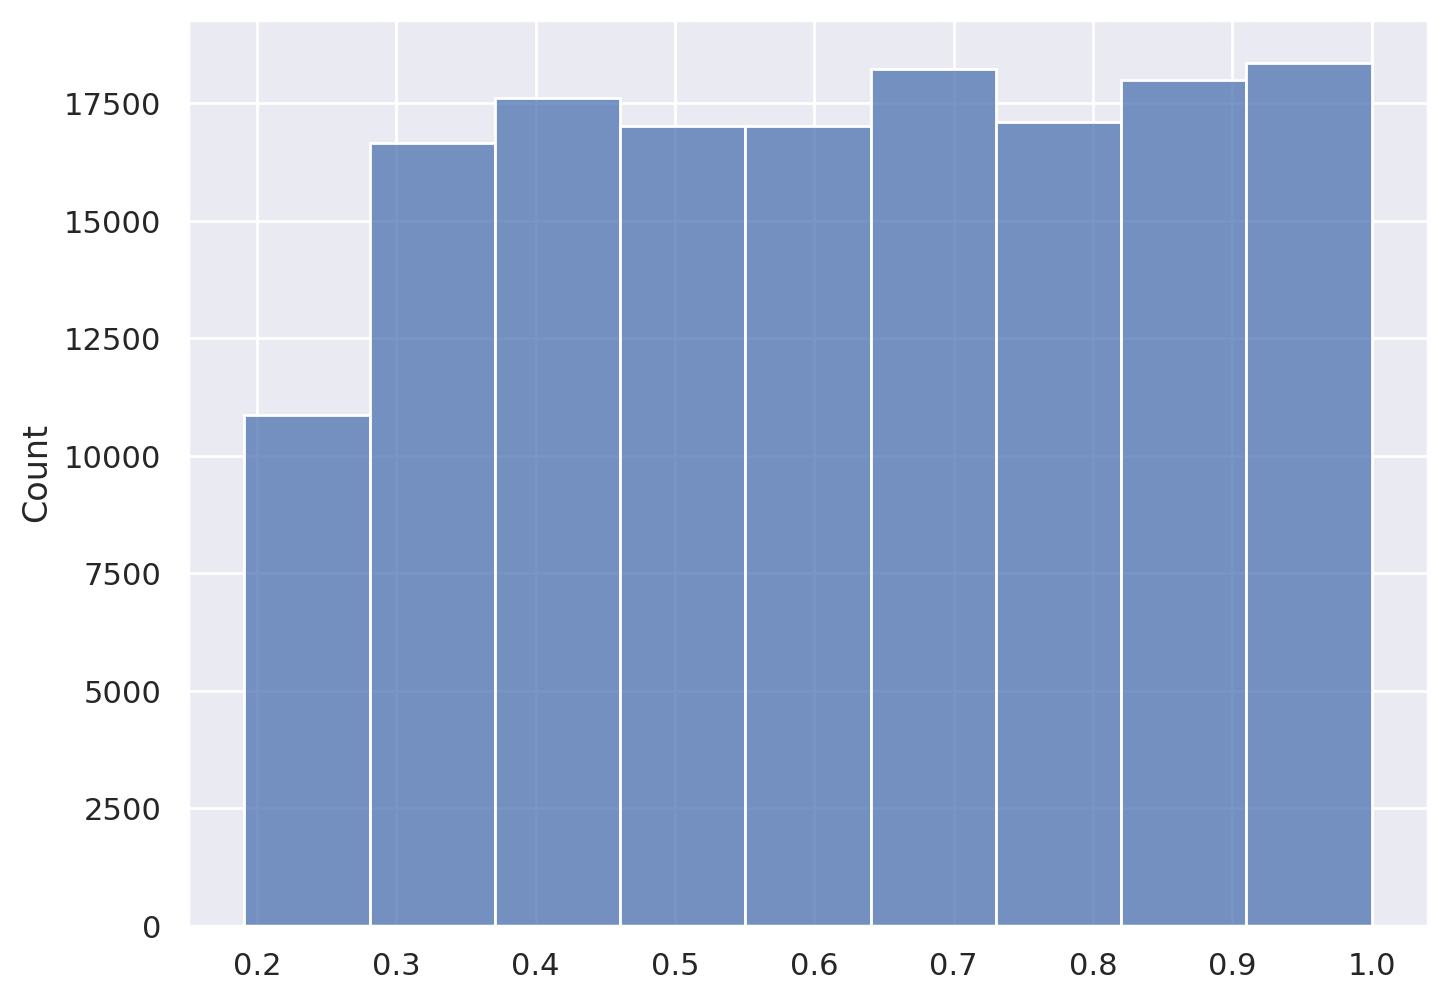

In [35]:
plt.figure()
seaborn.histplot(q_counts, stat="count", bins=9)

# is this one working now?
# doesn't look very flat, thats for sure

# Now lets re-bin/re-sample the binary bins so that instead of adding like 150+ bins we only add like 10 ish

I't thinking `np.digitize` might be the way to go here given that we want to bin by the mean mass but still add the total mass and keep track of each bin's make-up.

In [36]:
# Have a look at models
stop

NameError: name 'stop' is not defined

In [37]:
l = limepy(
    M=1e6, phi0=6, g=0.8, mj=mj, Mj=Mj, delta=0.45, rh=8, ra=10 ** 1.23, project=True
)

In [38]:
l_bin = limepy(
    M=1e6,
    phi0=6,
    g=0.8,
    mj=mj_new,
    Mj=Mj_new,
    delta=0.45,
    rh=8,
    ra=10 ** 1.23,
    project=True,
)

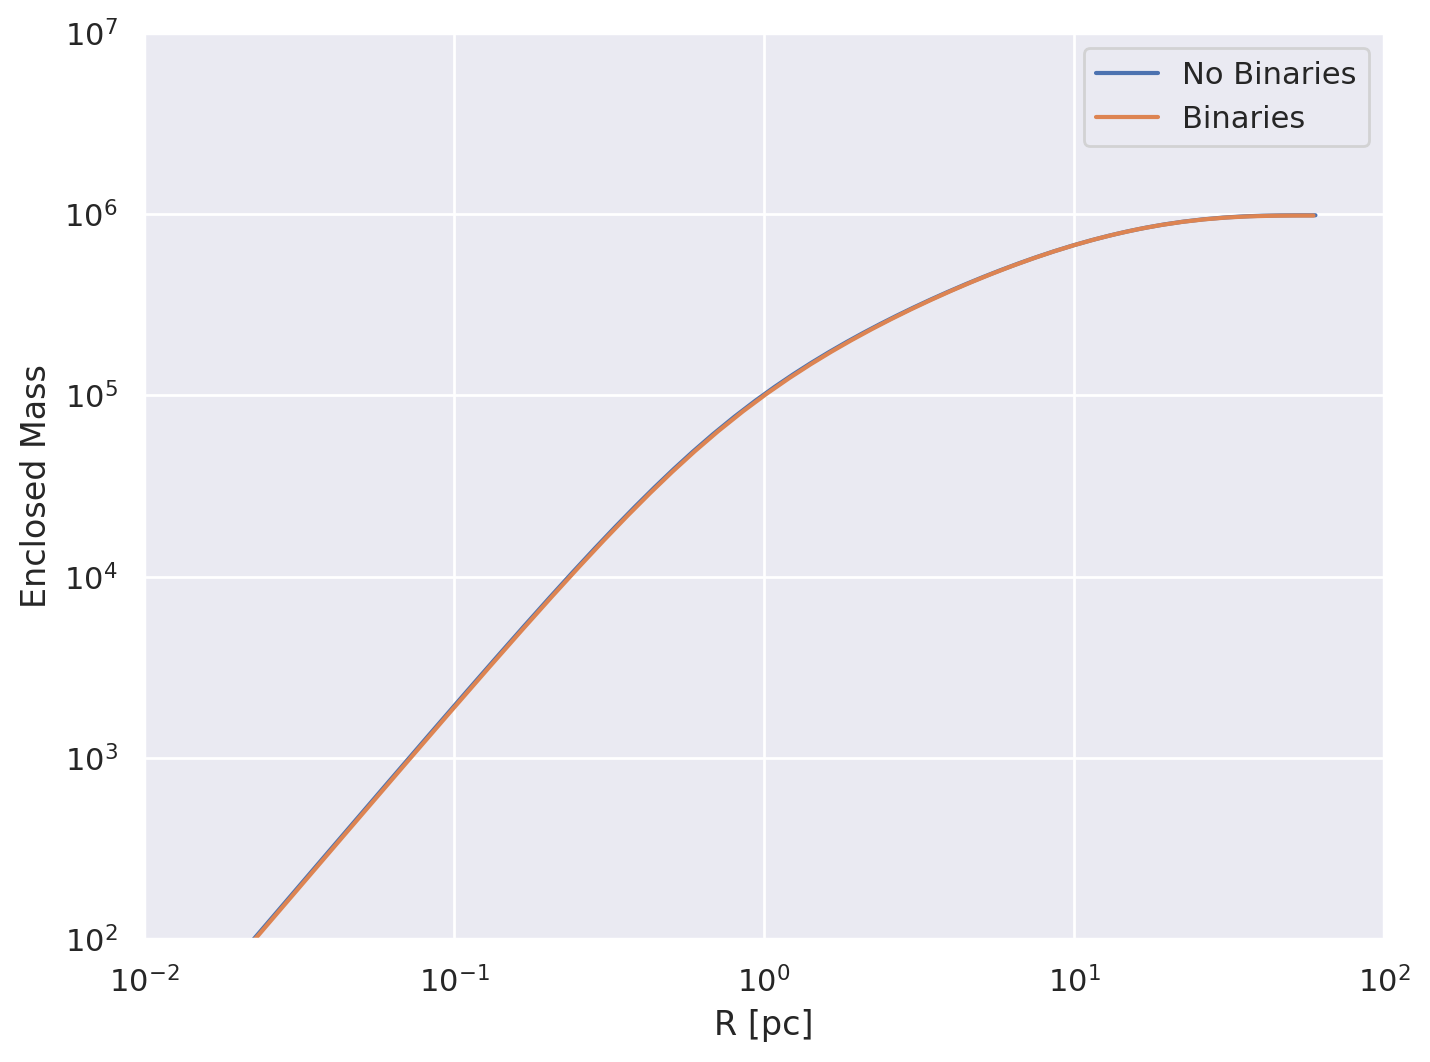

In [39]:
plt.figure()
plt.loglog()
plt.xlim(1e-2, 1e2)
plt.ylim(1e2, 1e7)
plt.plot(l.r, l.mcp, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Enclosed Mass")
plt.plot(l_bin.r, l_bin.mcp, label="Binaries")
plt.legend()

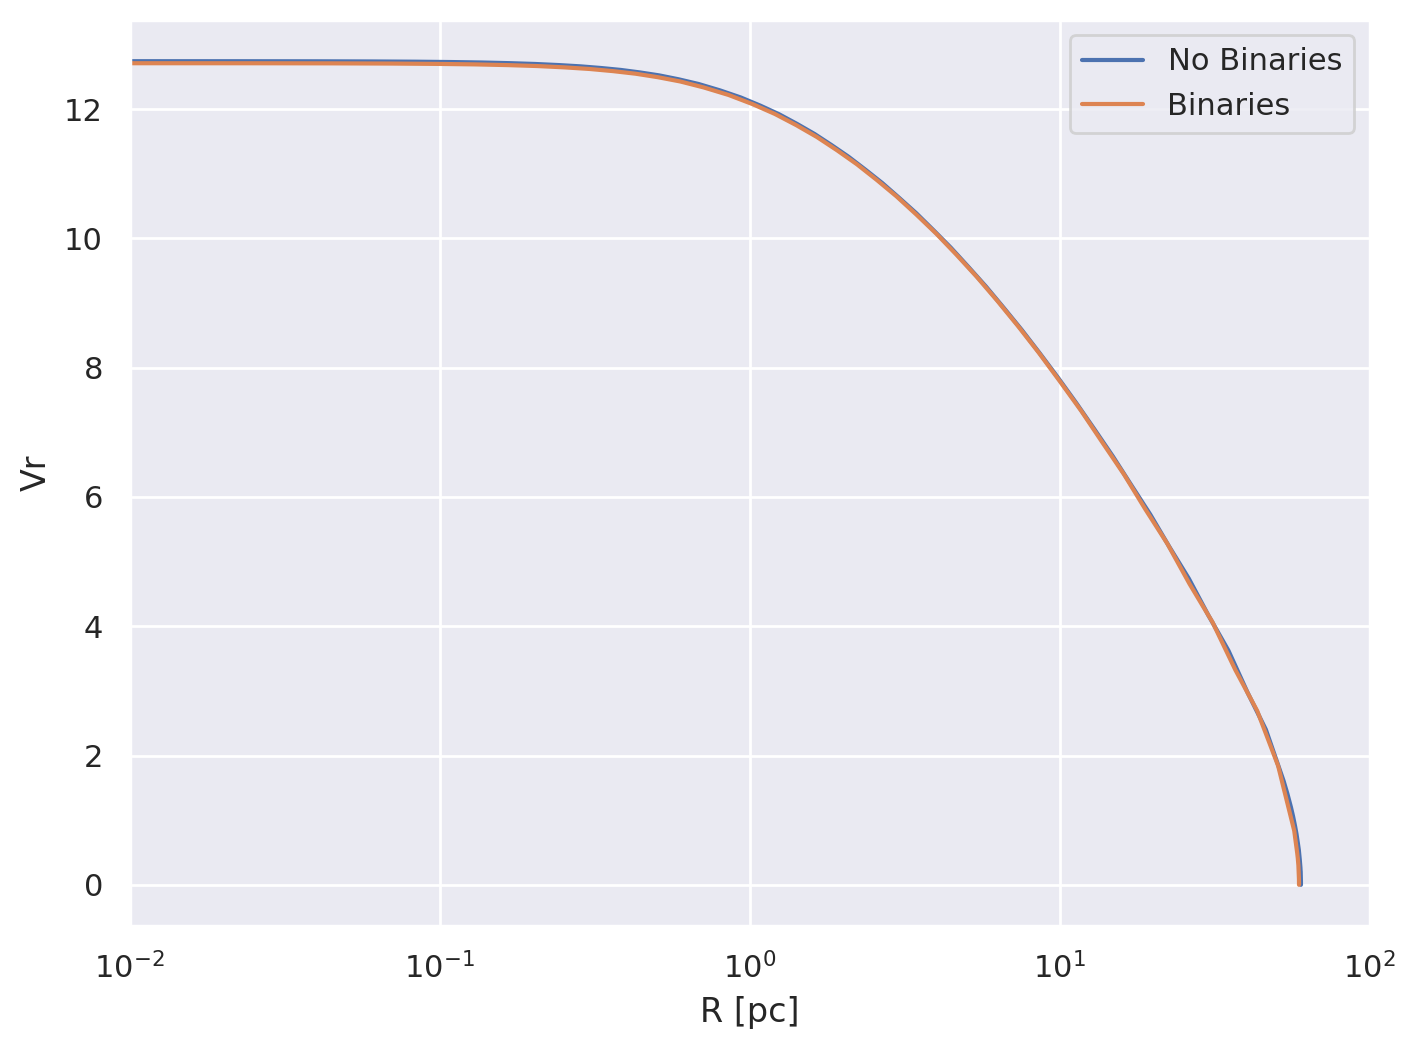

In [40]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2R), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vr")
plt.plot(l_bin.r, np.sqrt(l_bin.v2R), label="Binaries")
plt.legend()

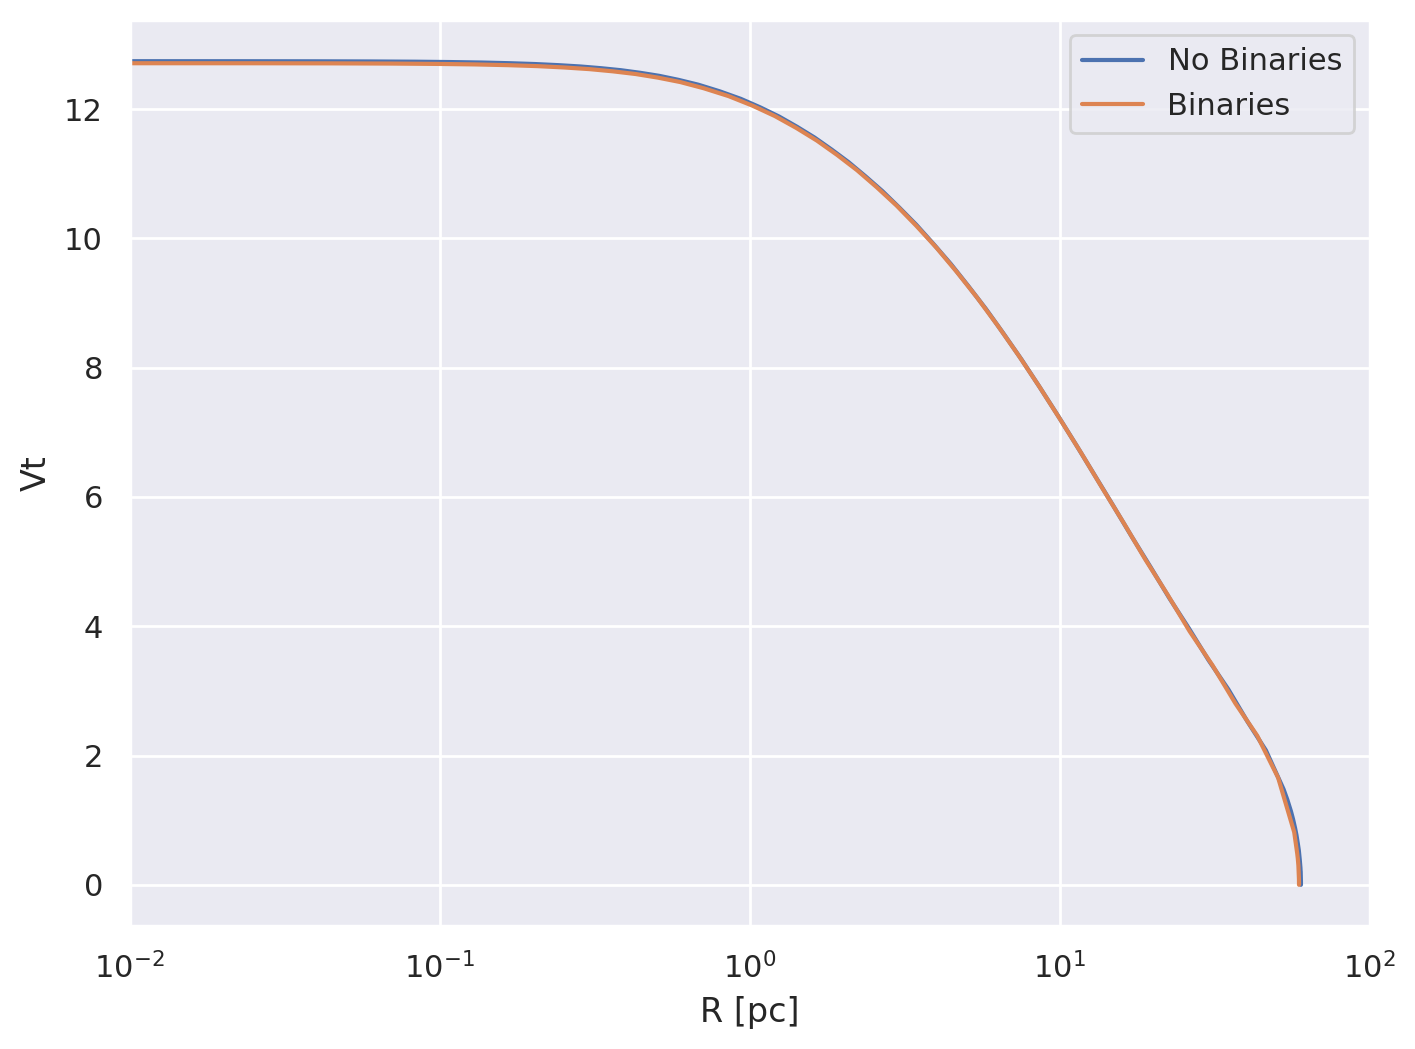

In [41]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2T), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vt")
plt.plot(l_bin.r, np.sqrt(l_bin.v2T), label="Binaries")
plt.legend()

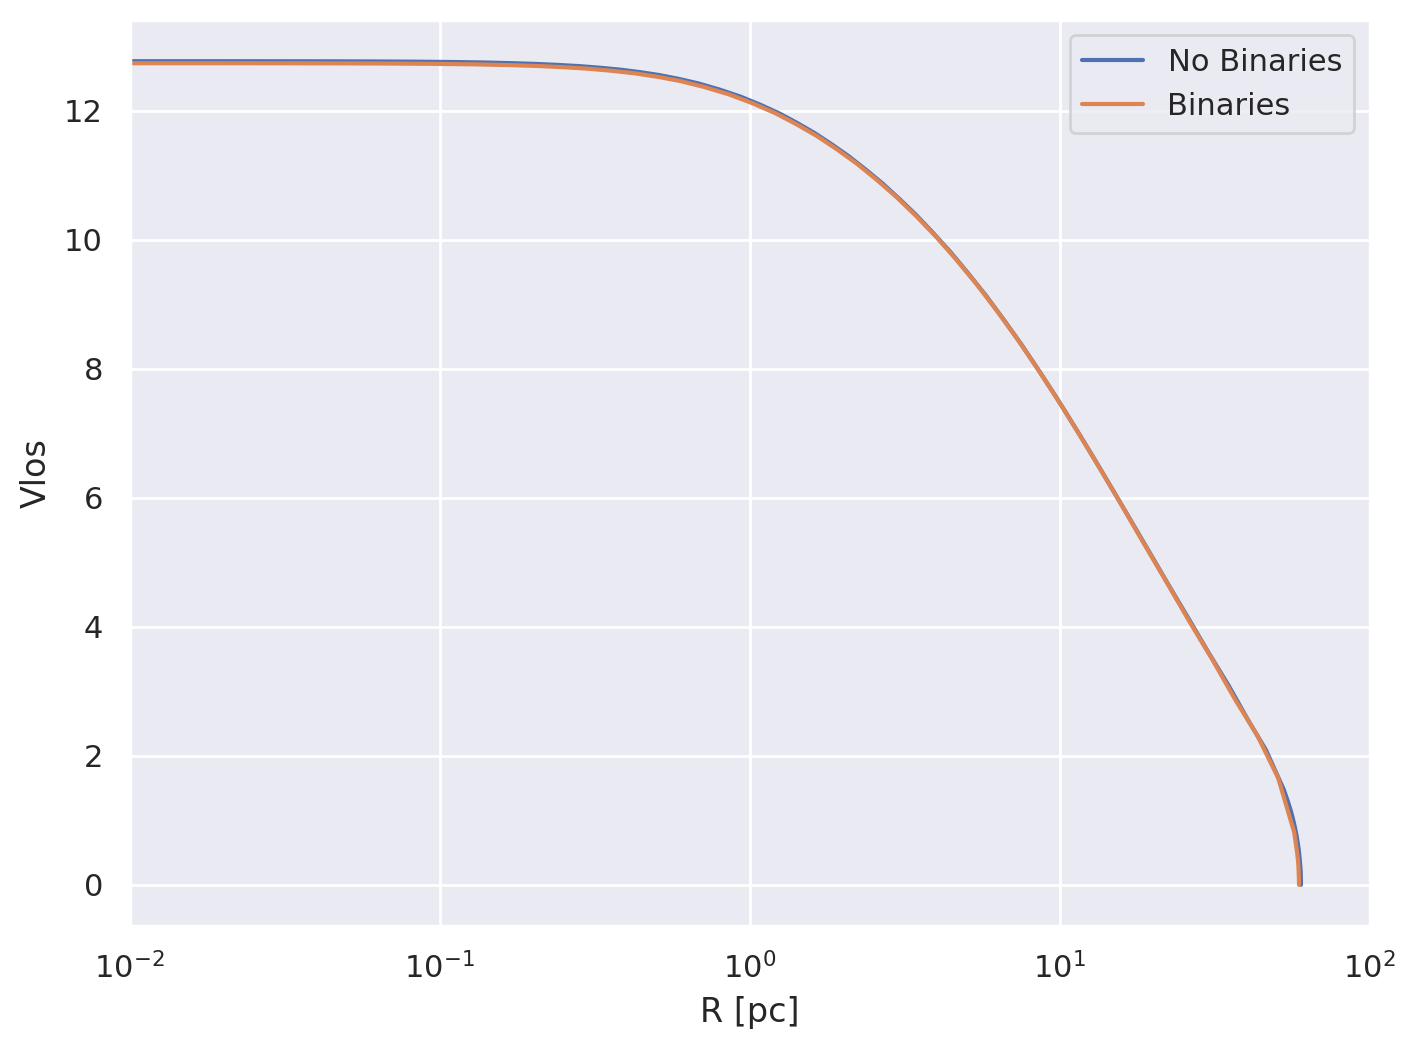

In [42]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2p), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vlos")
plt.plot(l_bin.r, np.sqrt(l_bin.v2p), label="Binaries")
plt.legend()

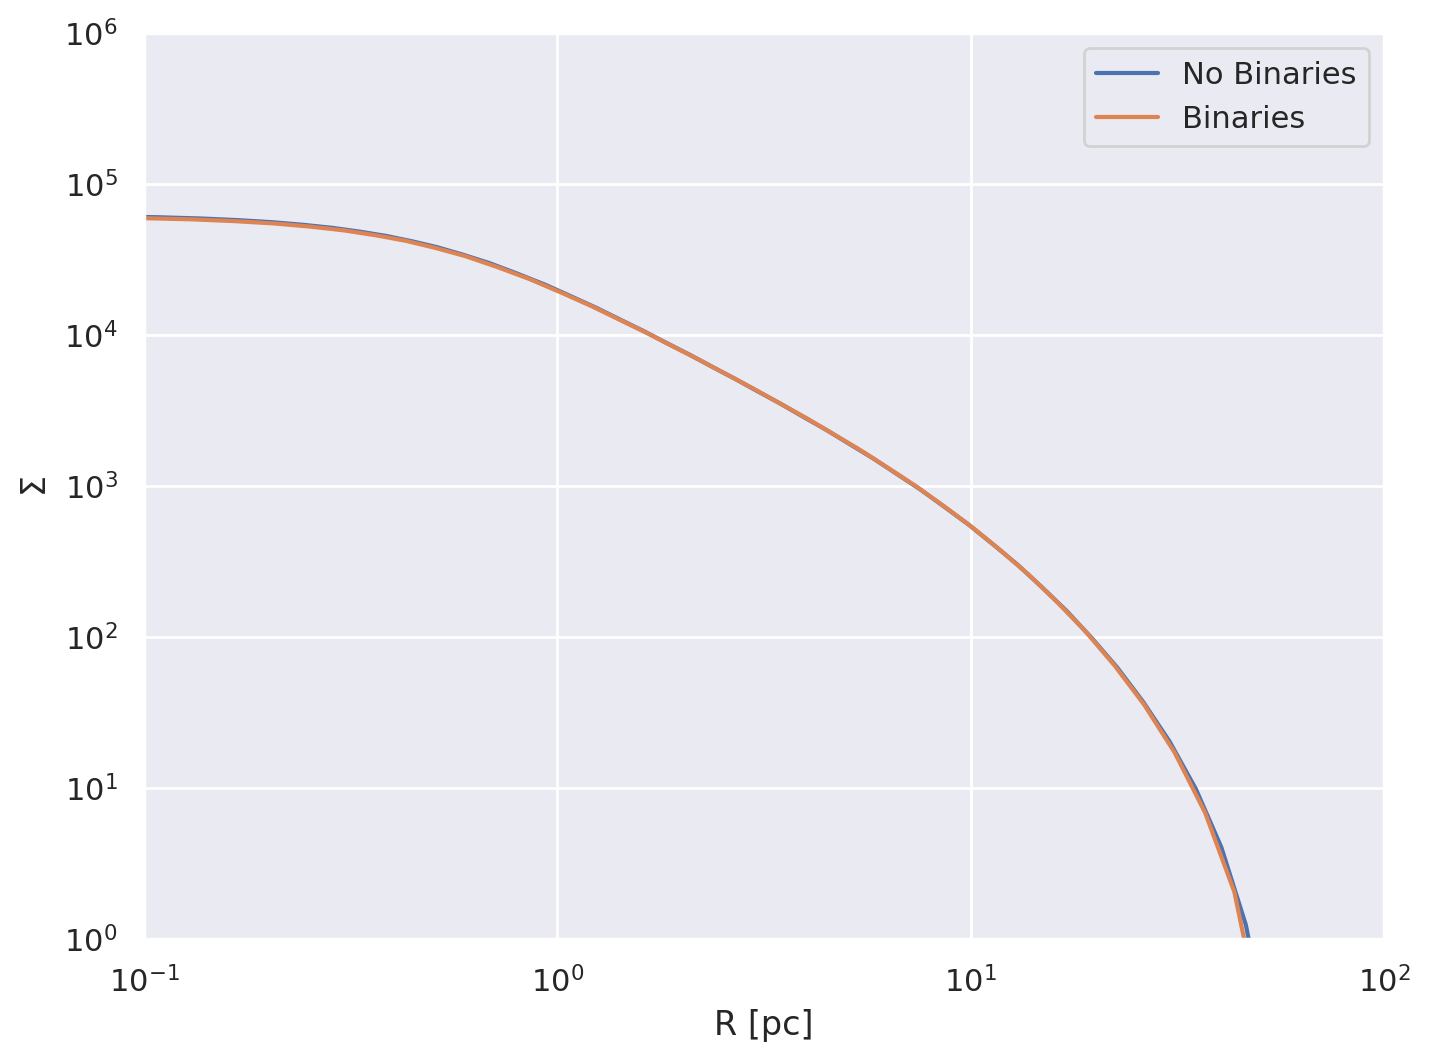

In [43]:
plt.figure()
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(1e-0, 1e6)
plt.plot(l.r, l.Sigma, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel(r"$\Sigma$")
plt.plot(l_bin.r, l_bin.Sigma, label="Binaries")
plt.legend()